In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
y = df['species']
X = df.copy().drop("species", axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training split input: {X_train.shape}")
print(f"Testing split input: {X_test.shape}")

Training split input: (120, 4)
Testing split input: (30, 4)


In [7]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)
print("Decision Tree Classifier Created!")

Decision Tree Classifier Created!


In [8]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [9]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [10]:
from sklearn import metrics
print(f"ID3 model accuracy: {metrics.accuracy_score(y_test, y_pred)*100}%")

ID3 model accuracy: 100.0%


In [11]:
metrics.confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

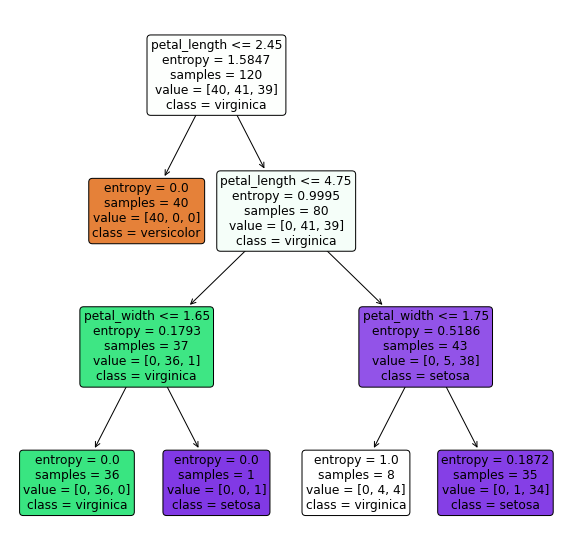

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))

decision_tree = plot_tree(decision_tree=clf, feature_names=df.columns, 
                          class_names=list(set(df["species"])), filled=True,
                          precision=4, rounded=True)

In [13]:
### ID3 on Tennis Dataset
tennis_dataset = "datasets/play_tennis_new.csv"
df = pd.read_csv(tennis_dataset)
df.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [14]:
y = le.fit_transform(df['PlayTennis'])
X = df.drop('PlayTennis', axis=1).apply(le.fit_transform)
X

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training split input: {X_train.shape}")
print(f"Testing split input: {X_test.shape}")

Training split input: (11, 4)
Testing split input: (3, 4)


In [16]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)
print("Decision Tree Classifier Created!")

Decision Tree Classifier Created!


In [17]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0])

In [18]:
y_test

array([1, 1, 0])

In [19]:
print(f"ID3 model accuracy: {metrics.accuracy_score(y_test, y_pred)*100}%")

ID3 model accuracy: 66.66666666666666%


In [20]:
metrics.confusion_matrix(y_test, y_pred)

array([[1, 0],
       [1, 1]], dtype=int64)

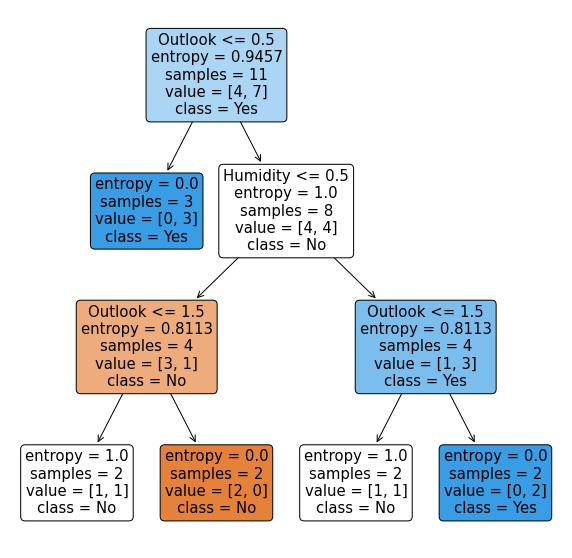

In [21]:
plt.figure(figsize=(10, 10))
decision_tree = plot_tree(decision_tree=clf, feature_names=X.columns,
                          class_names=['No', 'Yes'], filled=True,
                          precision=4, rounded=True)